In [1]:
from glob import glob

files = glob('pv_profiles*/*.csv')
files

['pv_profiles_1_days/pv_profile_PPE_4.csv',
 'pv_profiles_1_days/pv_profile_PPE_1.csv',
 'pv_profiles_1_days/pv_profile_PPE_3.csv',
 'pv_profiles_1_days/pv_profile_PPE_2.csv',
 'pv_profiles_2_days/pv_profile_PPE_6.csv',
 'pv_profiles_2_days/pv_profile_PPE_7.csv',
 'pv_profiles_2_days/pv_profile_PPE_5.csv',
 'pv_profiles_2_days/pv_profile_PPE_4.csv',
 'pv_profiles_2_days/pv_profile_PPE_1.csv',
 'pv_profiles_2_days/pv_profile_PPE_2.csv',
 'pv_profiles/pv_profile_2023_06_PPE_2_prosument.csv',
 'pv_profiles/pv_profile_2023_06_PPE_6_prosument.csv',
 'pv_profiles/pv_profile_2023_06_PPE_1_prosument.csv',
 'pv_profiles/pv_profile_2023_06_PPE_7_consument.csv',
 'pv_profiles/pv_profile_2023_06_PPE_4_prosument.csv',
 'pv_profiles/pv_profile_2023_06_PPE_5_consument_work.csv',
 'pv_profiles/pv_profile_2023_06_PPE_3.csv',
 'pv_profiles/pv_profile_2023_06_PPE_8_consument.csv']

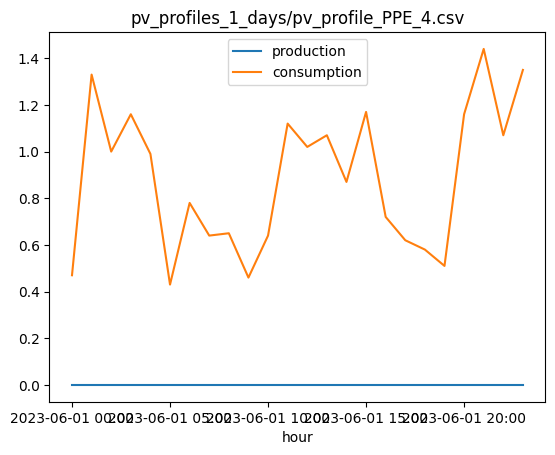

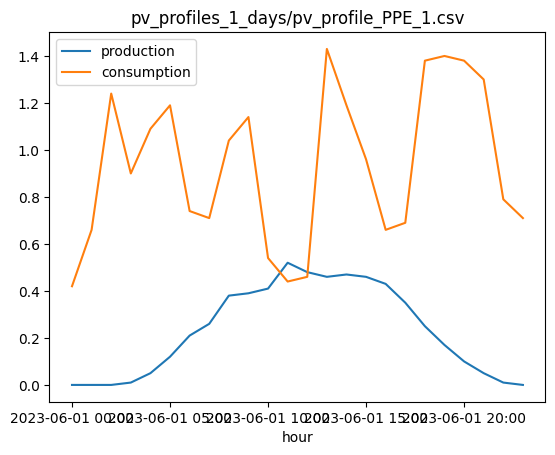

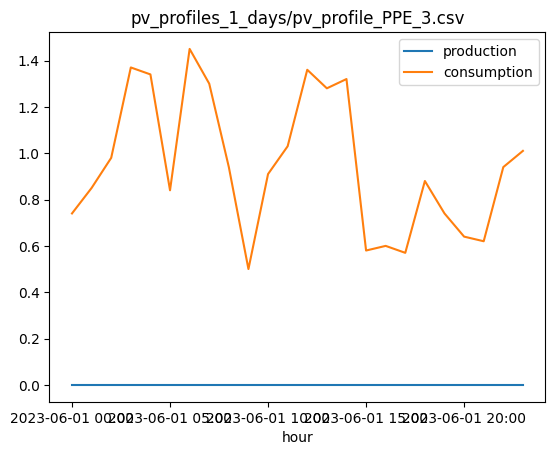

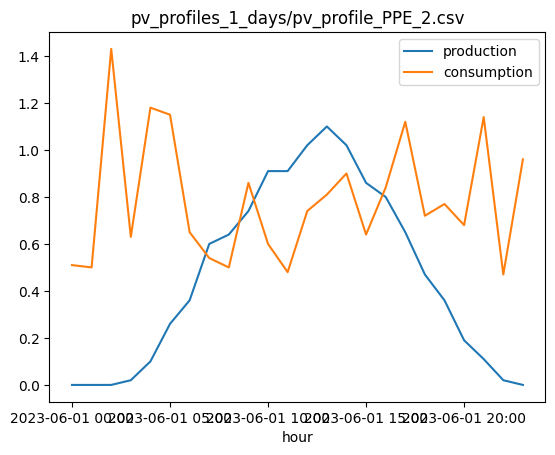

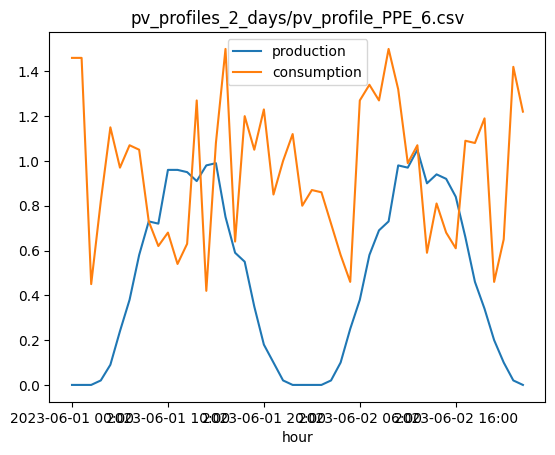

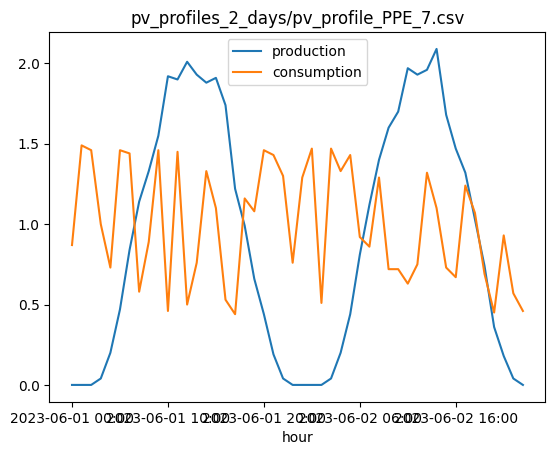

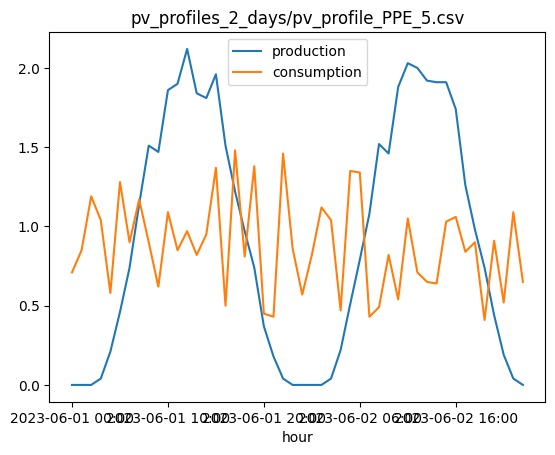

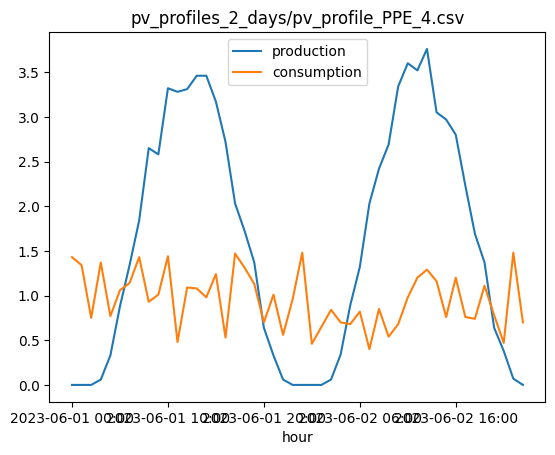

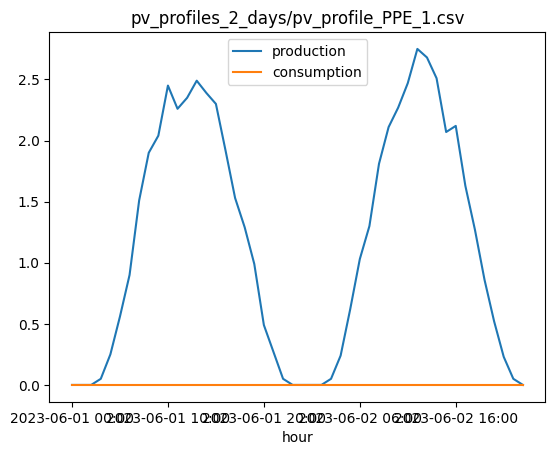

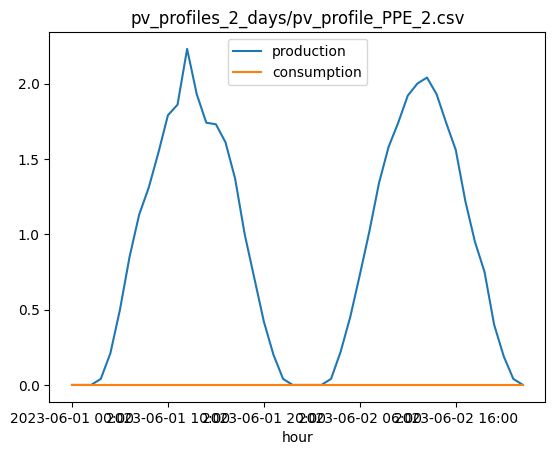

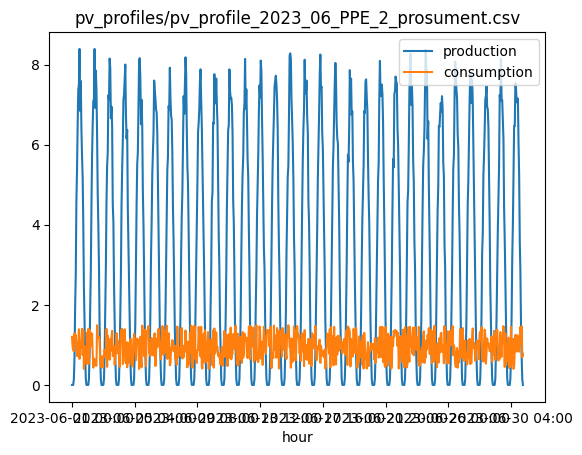

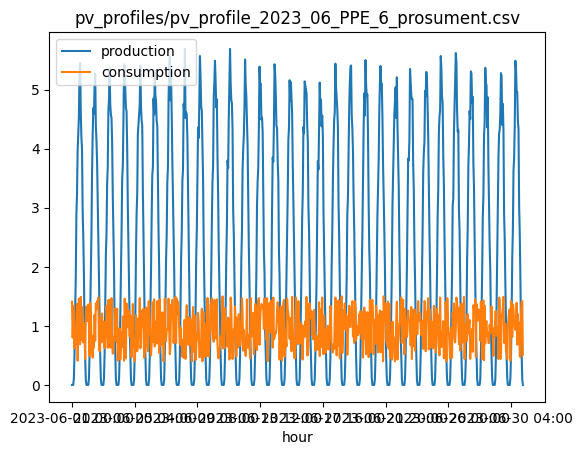

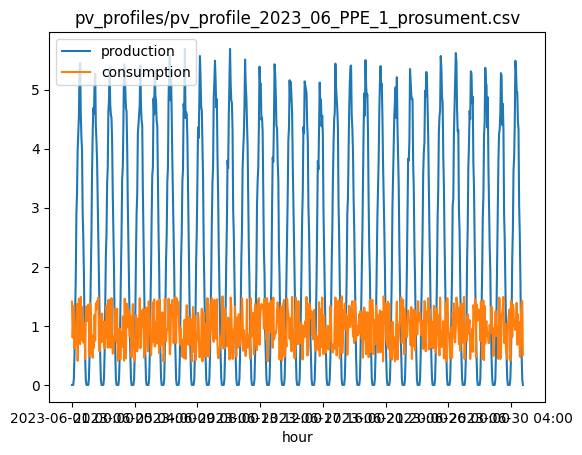

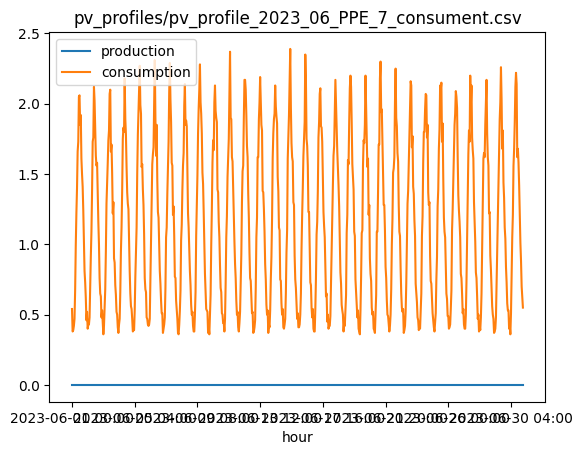

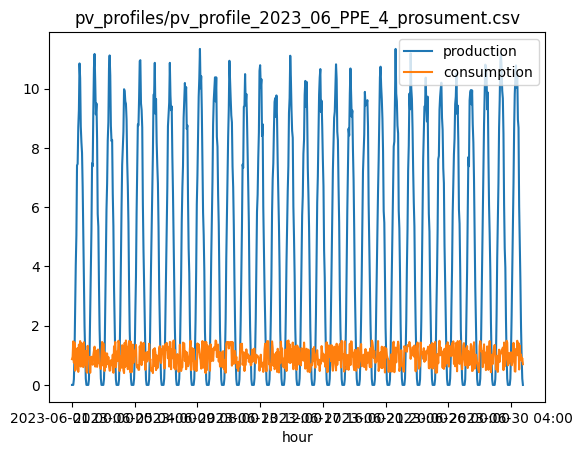

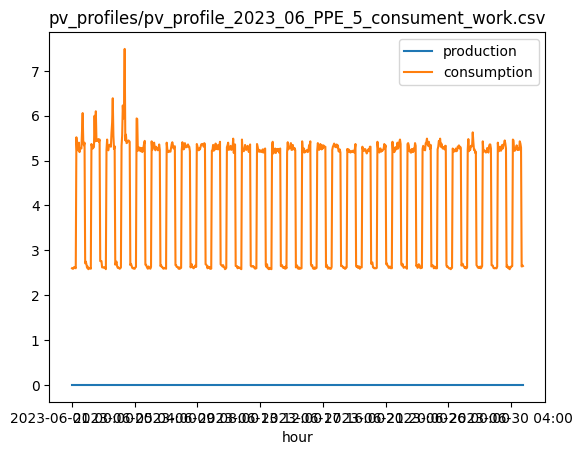

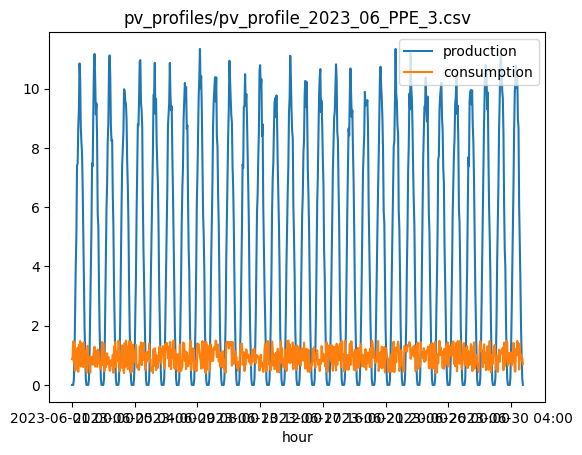

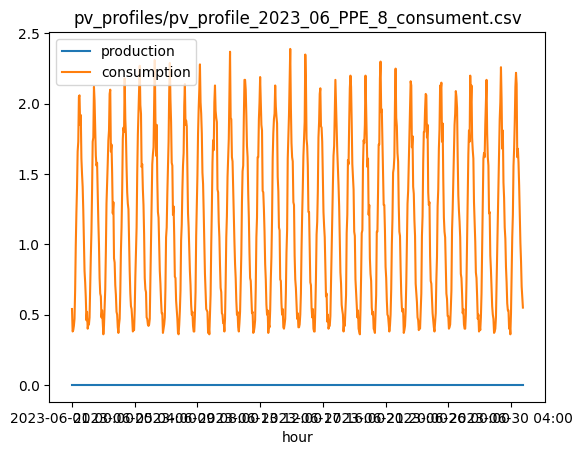

In [2]:
import pandas as pd

import matplotlib.pyplot as plt

for file in files:
    df = pd.read_csv(file)
    df.set_index(df.columns[0], inplace=True)
    df.plot()
    plt.title(file)
    plt.show()

19:02:17 - cmdstanpy - INFO - Chain [1] start processing
19:02:17 - cmdstanpy - INFO - Chain [1] done processing
19:02:17 - cmdstanpy - INFO - Chain [1] start processing
19:02:17 - cmdstanpy - INFO - Chain [1] done processing
19:02:17 - cmdstanpy - INFO - Chain [1] start processing
19:02:17 - cmdstanpy - INFO - Chain [1] done processing
19:02:17 - cmdstanpy - INFO - Chain [1] start processing
19:02:17 - cmdstanpy - INFO - Chain [1] done processing
19:02:18 - cmdstanpy - INFO - Chain [1] start processing
19:02:18 - cmdstanpy - INFO - Chain [1] done processing
19:02:18 - cmdstanpy - INFO - Chain [1] start processing
19:02:18 - cmdstanpy - INFO - Chain [1] done processing
19:02:18 - cmdstanpy - INFO - Chain [1] start processing
19:02:18 - cmdstanpy - INFO - Chain [1] done processing
19:02:18 - cmdstanpy - INFO - Chain [1] start processing
19:02:18 - cmdstanpy - INFO - Chain [1] done processing
19:02:18 - cmdstanpy - INFO - Chain [1] start processing
19:02:18 - cmdstanpy - INFO - Chain [1]

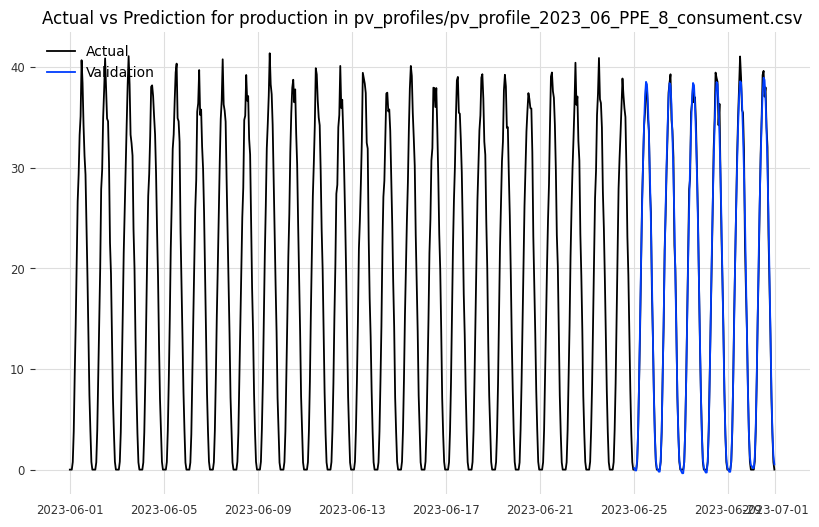

19:02:39 - cmdstanpy - INFO - Chain [1] start processing
19:02:39 - cmdstanpy - INFO - Chain [1] done processing
19:02:39 - cmdstanpy - INFO - Chain [1] start processing
19:02:39 - cmdstanpy - INFO - Chain [1] done processing
19:02:39 - cmdstanpy - INFO - Chain [1] start processing
19:02:39 - cmdstanpy - INFO - Chain [1] done processing
19:02:39 - cmdstanpy - INFO - Chain [1] start processing
19:02:40 - cmdstanpy - INFO - Chain [1] done processing
19:02:40 - cmdstanpy - INFO - Chain [1] start processing
19:02:40 - cmdstanpy - INFO - Chain [1] done processing
19:02:40 - cmdstanpy - INFO - Chain [1] start processing
19:02:40 - cmdstanpy - INFO - Chain [1] done processing
19:02:40 - cmdstanpy - INFO - Chain [1] start processing
19:02:40 - cmdstanpy - INFO - Chain [1] done processing
19:02:40 - cmdstanpy - INFO - Chain [1] start processing
19:02:40 - cmdstanpy - INFO - Chain [1] done processing
19:02:40 - cmdstanpy - INFO - Chain [1] start processing
19:02:40 - cmdstanpy - INFO - Chain [1]

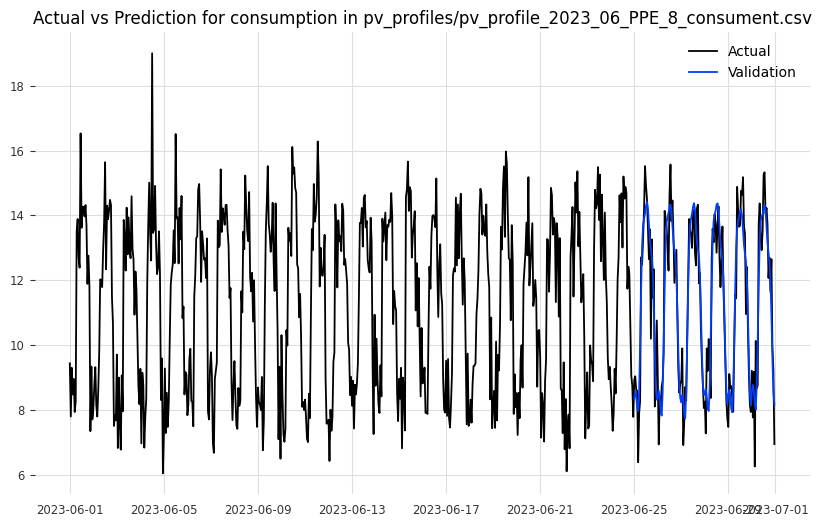

In [16]:
from darts import TimeSeries
from darts.models import Prophet
from darts.metrics import mse

import numpy as np

files = glob('pv_profiles/*.csv')
files.sort()
# format 2023-06-26 05:00
df = pd.read_csv(files[0])
df.set_index(df.columns[0], inplace=True)
df.index = pd.to_datetime(df.index, format='%Y-%m-%d %H:%M')
for file in files[1:]:
    temp_df = pd.read_csv(file)
    temp_df.set_index(temp_df.columns[0], inplace=True)
    temp_df.index = pd.to_datetime(temp_df.index, format='%Y-%m-%d %H:%M')
    df["consumption"] = df["consumption"] + temp_df["consumption"]
    df["production"] = df["production"] + temp_df["production"]

for col, covarites_col in (["production", "consumption"], ["consumption", "production"]):
    df[col] = pd.to_numeric(df[col], errors='coerce')
    covaties_df = df[[covarites_col]]
    df_temp = df[[col]]
    validation_num = int(0.8*len(df_temp))
    predictions = []
    for i in range(validation_num, len(df_temp)):
        df_temp_train = df_temp.iloc[:i]
        df_temp_covarites_train = covaties_df.iloc[:i]
        #df_temp_train = df_temp_train.join(df_temp_covarites_train)
        ts = TimeSeries.from_dataframe(df_temp_train)

        model = Prophet(add_encoders={
'cyclic': {'future': ['hour', 'dayofweek']},
})
        model.fit(ts)
        prediction = model.predict(1)
        predictions.append(prediction.values()[0])
    predictions = np.array(predictions)
    temp_df = df_temp.iloc[validation_num:]
    temp_df['prediction'] = predictions
    

    plt.figure(figsize=(10, 6))
    plt.plot(df_temp[col], label='Actual')
    plt.plot(temp_df["prediction"], label='Validation')
    plt.title(f'Actual vs Prediction for {col} in {file}')
    plt.legend()
    plt.show()